# 4. If the profit margin is more than 10% it is good and the customer else bad. Build predictive models to identify profitable customers considering relevant variables



# IMPORTING LIBRARIES

In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# LOADING DATASET

In [3]:
df=pd.read_csv('C:\\Users\\sowndariya\\Desktop\\Prasath sir\\Datasets\\global_superstore_2018.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Margin,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,14.00%,39.66,Medium
1,29465,ID-2015-BD116051-42248,01-09-15,04-09-15,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,42.90%,18.72,Medium
2,24598,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,3.98%,14.10,Medium
3,24597,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,46.96%,11.01,Medium
4,29464,ID-2015-BD116051-42248,01-09-15,04-09-15,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,11.95%,5.72,Medium


# EXPLORATORY DATA ANALYSIS

In [4]:
pd.set_option('max_rows',60000)
pd.set_option('max_columns',25)

In [5]:
df.shape

(51290, 25)

In [6]:
df['Segment'].unique()

array(['Home Office', 'Consumer', 'Corporate'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Product Name    51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Category        51290 non-null 

In [8]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Product Name          0
Sub-Category          0
Category              0
Sales                 0
Quantity              0
Discount              0
Profit                0
Margin                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
df.nunique()

Row ID            51290
Order ID          25728
Order Date         1429
Ship Date          1463
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1106
Country             165
Region               23
Market                5
Product ID         3788
Product Name       3788
Sub-Category         17
Category              3
Sales             22995
Quantity             14
Discount             27
Profit            24575
Margin             5942
Shipping Cost     16452
Order Priority        4
dtype: int64

In [10]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Margin             object
Shipping Cost     float64
Order Priority     object
dtype: object

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Margin', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Margin             object
Shipping Cost     float64
Order Priority     object
dtype: object

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Margin', 'Shipping Cost', 'Order Priority'],
      dtype='object')

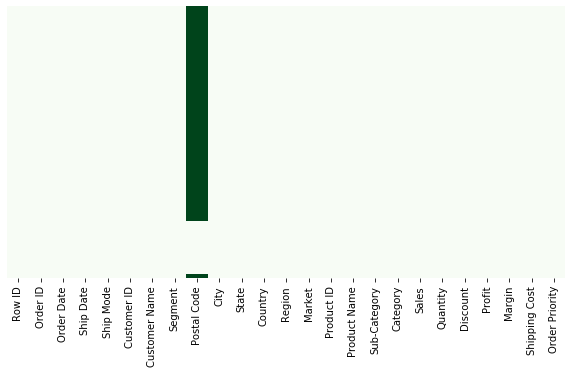

In [14]:
#checking null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Greens')
plt.show()

In [15]:
#remove unwanted columns
df.drop(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name','Product ID','Quantity','Discount', 'Product Name','Region','Order Priority','City', 'State', 'Country','Postal Code'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Segment', 'Market', 'Sub-Category', 'Category', 'Sales', 'Profit',
       'Margin', 'Shipping Cost'],
      dtype='object')

In [17]:
df.head()

,Segment,Market,Sub-Category,Category,Sales,Profit,Margin,Shipping Cost
0,Home Office,Asia Pacific,Bookcases,Furniture,731.82,102.42,14.00%,39.66
1,Consumer,Asia Pacific,Supplies,Office Supplies,243.54,104.49,42.90%,18.72
2,Home Office,Asia Pacific,Machines,Technology,346.32,13.77,3.98%,14.10
3,Home Office,Asia Pacific,Furnishings,Furniture,169.68,79.68,46.96%,11.01
4,Consumer,Asia Pacific,Envelopes,Office Supplies,203.88,24.36,11.95%,5.72


In [18]:
df['Margin']=df['Margin'].apply(lambda x: x[:-1])

In [19]:
df['Margin']=df['Margin'].astype('float')
df['Margin10']=df['Margin'].apply(lambda x: 1 if x>10 else 0)

In [20]:
df.head()

,Segment,Market,Sub-Category,Category,Sales,Profit,Margin,Shipping Cost,Margin10
0,Home Office,Asia Pacific,Bookcases,Furniture,731.82,102.42,14.00,39.66,1
1,Consumer,Asia Pacific,Supplies,Office Supplies,243.54,104.49,42.90,18.72,1
2,Home Office,Asia Pacific,Machines,Technology,346.32,13.77,3.98,14.10,0
3,Home Office,Asia Pacific,Furnishings,Furniture,169.68,79.68,46.96,11.01,1
4,Consumer,Asia Pacific,Envelopes,Office Supplies,203.88,24.36,11.95,5.72,1


In [21]:
df.drop('Margin',axis=1,inplace=True)

In [22]:
df.dtypes

Segment           object
Market            object
Sub-Category      object
Category          object
Sales            float64
Profit           float64
Shipping Cost    float64
Margin10           int64
dtype: object

In [23]:
df.nunique()

Segment              3
Market               5
Sub-Category        17
Category             3
Sales            22995
Profit           24575
Shipping Cost    16452
Margin10             2
dtype: int64

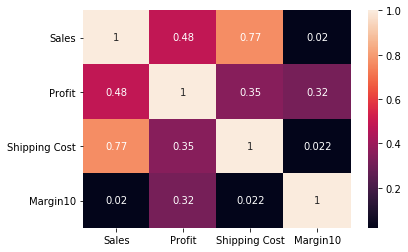

In [24]:
sns.heatmap(df.corr(),annot=True)

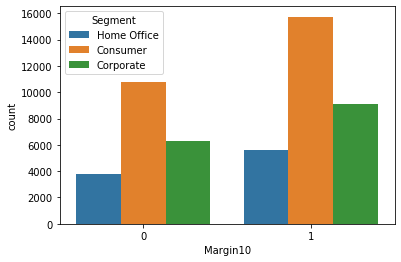

In [25]:
sns.countplot('Margin10',data=df,hue='Segment')

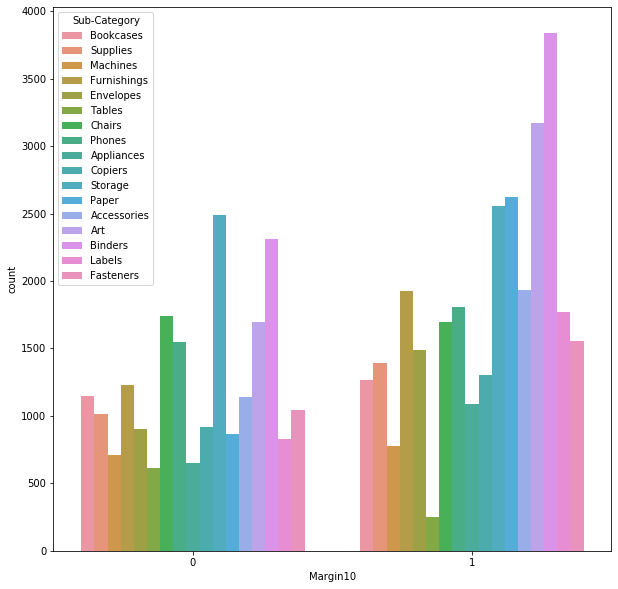

In [26]:
plt.rcParams['figure.figsize']=(10,10)
sns.countplot('Margin10',data=df,hue='Sub-Category')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B899982088>,
      dtype=object)

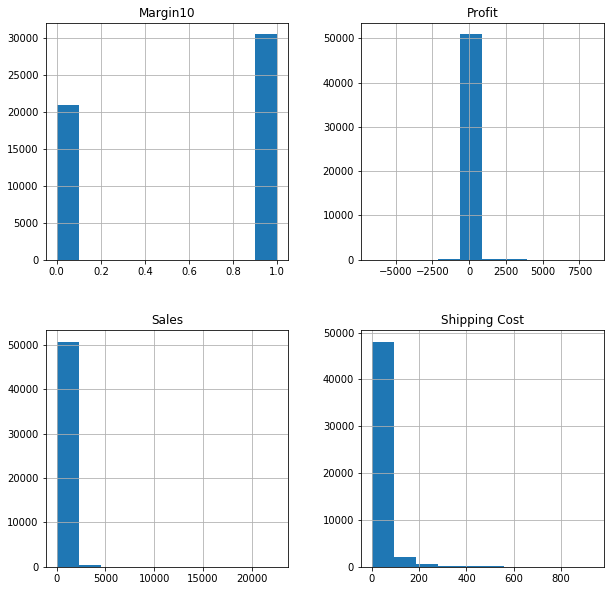

In [37]:
df.hist()

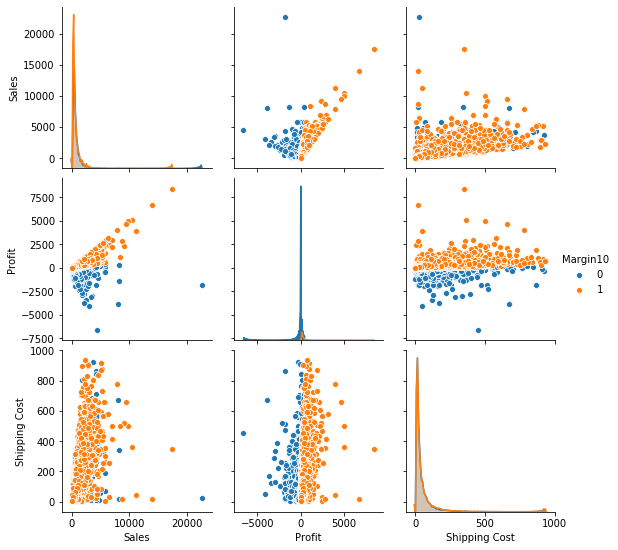

In [32]:
sns.pairplot(df,hue='Margin10')

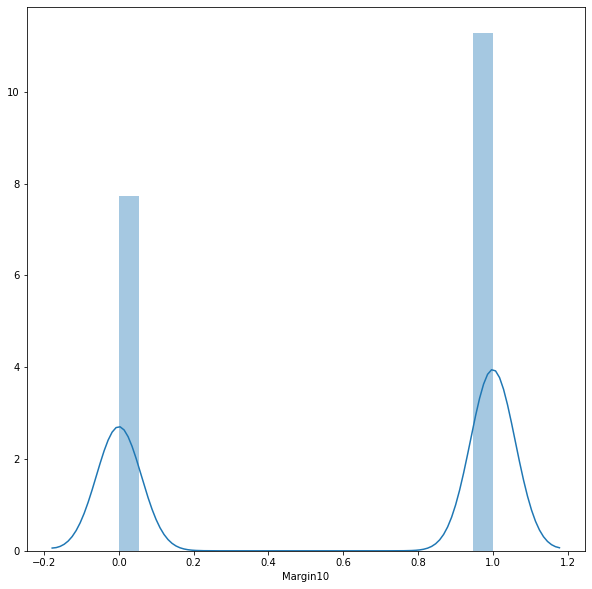

In [28]:
#target variable
target=df['Margin10']
sns.distplot(target)

In [29]:
#splitting categorical and numerical variable
categorical=[col for col in df.columns.values if df[col].dtype=='object']
df_cat=df[categorical]
df_num1=df.drop(categorical,axis=1)

In [30]:
df_num1.drop('Margin10',axis=1,inplace=True)

In [33]:
#two columns are not normally distributed, so treated with log transformation
df_num=df_num1[['Sales','Shipping Cost']]

In [34]:
#skewness 
df_num_skew=df_num.skew()
df_num_skew=df_num_skew[df_num_skew>0.75]
df_num[df_num_skew.index]=np.log(df_num[df_num_skew.index])


In [35]:
df_num.isnull().sum()

Sales            0
Shipping Cost    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8994EE988>,
      dtype=object)

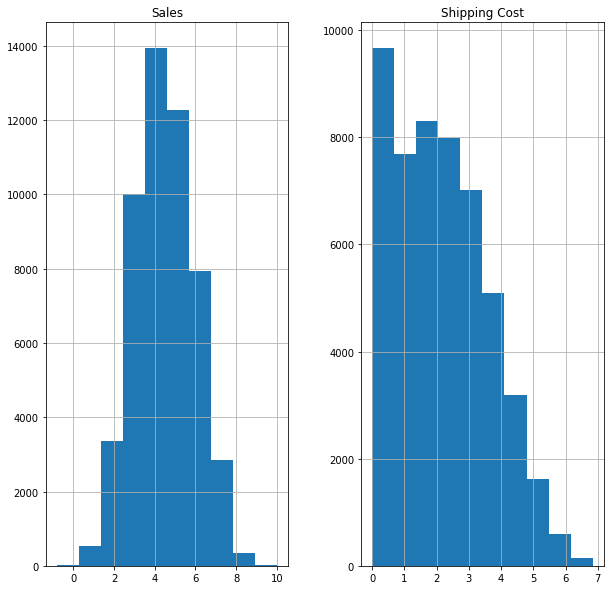

In [36]:
df_num.hist()

In [40]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat.head()

,Segment_Corporate,Segment_Home Office,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Category_Office Supplies,Category_Technology
0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [43]:
data=pd.concat([df_cat,df_num,df['Profit']],axis=1)
data.head()

,Segment_Corporate,Segment_Home Office,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Category_Office Supplies,Category_Technology,Sales,Shipping Cost,Profit
0,0,1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.595535,3.680343,102.42
1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,5.495281,2.929592,104.49
2,0,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,5.847363,2.646175,13.77
3,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.133914,2.398804,79.68
4,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5.317532,1.743969,24.36


In [46]:
#Profit using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
s=np.array(data['Profit']).reshape(-1,1)
dd=ss.fit_transform(s)
dd

array([[ 0.42336426],
       [ 0.43523766],
       [-0.08512702],
       ...,
       [-0.21602696],
       [-1.16202723],
       [-0.19465484]])

In [47]:
data['Profit']=dd

In [48]:
data.head()

,Segment_Corporate,Segment_Home Office,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Category_Office Supplies,Category_Technology,Sales,Shipping Cost,Profit
0,0,1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.595535,3.680343,0.423364
1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,5.495281,2.929592,0.435238
2,0,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,5.847363,2.646175,-0.085127
3,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.133914,2.398804,0.292929
4,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5.317532,1.743969,-0.024383


In [49]:
x=data
y=target

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [51]:
#Building models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn import model_selection

In [52]:
models=[]
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SGDC',SGDClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('GNB',GaussianNB()))
models.append(('SVM',SVC()))


In [54]:
res=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=7)
    resultss=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    res.append(resultss)
    names.append(name)
    print(name,resultss.mean(),resultss.std())


DTC 0.9959334734235774 0.0011830758722133235
RFC 0.98167281403757 0.0015249561185235025
SGDC 0.8831564674608214 0.013193761912586276
GBC 0.9916719452608618 0.001645596213691572
ETC 0.9415925220044852 0.0029839661766593185
KNN 0.7782081713103557 0.007215327926235107
LDA 0.6901096520316575 0.004763268880075313
GNB 0.6310897950540232 0.007876049464546854
SVM 0.9280840293243168 0.005511068465195564


In [56]:
#best model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_predd=gbc.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
#For Gradient Bossting CLassifier
print('accuracy',accuracy_score(y_predd,y_test))
print('confusion',confusion_matrix(y_predd,y_test))
print('classification_report',classification_report(y_predd,y_test))


accuracy 0.9935010073438617
confusion [[6125   12]
 [  88 9162]]
classification_report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6137
           1       1.00      0.99      0.99      9250

    accuracy                           0.99     15387
   macro avg       0.99      0.99      0.99     15387
weighted avg       0.99      0.99      0.99     15387

